In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/seth814/Audio-Classification.git

Cloning into 'Audio-Classification'...
remote: Enumerating objects: 344, done.
remote: Total 344 (delta 0), reused 0 (delta 0), pack-reused 344
Receiving objects: 100% (344/344), 94.87 MiB | 30.61 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Checking out files: 100% (307/307), done.


In [0]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5889 sha256=818fe0739b5f8f9e6d5c1df313364902c25a7c56ddb08a0f5fd495a655c32fe2
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 
import librosa  # common default audio library

from scipy.io import wavfile

from tqdm import tqdm_notebook

from python_speech_features import mfcc, logfbank

import IPython
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('/content/Audio-Classification/instruments.csv')

In [0]:
df.head()

,fname,label
0,5388d14d.wav,Saxophone
1,c685f05f.wav,Saxophone
2,36d20ab5.wav,Saxophone
3,d6665734.wav,Saxophone
4,7352e28f.wav,Saxophone


In [0]:
df.set_index('fname', inplace=True)

In [0]:
for f in df.index:
  rate, signal = wavfile.read('/content/Audio-Classification/wavfiles/' + f)
  df.at[f, 'length'] = signal.shape[0] / rate

In [0]:
df.head()

,label,length
fname,,
5388d14d.wav,Saxophone,4.14
c685f05f.wav,Saxophone,1.54
36d20ab5.wav,Saxophone,4.90
d6665734.wav,Saxophone,10.50
7352e28f.wav,Saxophone,6.24


In [0]:
def file_length(file):
  rate, signal = wavfile.read('/content/Audio-Classification/wavfiles/' + file)
  return signal.shape[0] / rate

In [0]:
df_test = df.reset_index()

In [0]:
df_test.head()

,fname,label,length
0,5388d14d.wav,Saxophone,4.14
1,c685f05f.wav,Saxophone,1.54
2,36d20ab5.wav,Saxophone,4.90
3,d6665734.wav,Saxophone,10.50
4,7352e28f.wav,Saxophone,6.24


In [0]:
file_length('5388d14d.wav')

4.14

In [0]:
df_test.head()

,fname,label,length
0,5388d14d.wav,Saxophone,4.14
1,c685f05f.wav,Saxophone,1.54
2,36d20ab5.wav,Saxophone,4.90
3,d6665734.wav,Saxophone,10.50
4,7352e28f.wav,Saxophone,6.24


In [0]:
df_test['lenght'] = df_test['fname'].apply(file_length)

In [0]:
df_test.head()

,fname,label,length,lenght
0,5388d14d.wav,Saxophone,4.14,4.14
1,c685f05f.wav,Saxophone,1.54,1.54
2,36d20ab5.wav,Saxophone,4.90,4.90
3,d6665734.wav,Saxophone,10.50,10.50
4,7352e28f.wav,Saxophone,6.24,6.24


In [0]:
df.head()

,label,length
fname,,
5388d14d.wav,Saxophone,4.14
c685f05f.wav,Saxophone,1.54
36d20ab5.wav,Saxophone,4.90
d6665734.wav,Saxophone,10.50
7352e28f.wav,Saxophone,6.24


In [0]:
df.label.nunique()

10

In [0]:
df.groupby(['label'])['length'].mean()

label
Acoustic_guitar     6.948667
Bass_drum           1.937333
Cello               5.000667
Clarinet            6.596000
Double_bass         3.206000
Flute               8.054667
Hi-hat              3.357333
Saxophone           7.124000
Snare_drum          3.987333
Violin_or_fiddle    4.530000
Name: length, dtype: float64

In [0]:
class_dict = df.groupby(['label'])['length'].mean()
classes = list(np.unique(df.label))

In [0]:
classes

['Acoustic_guitar',
 'Bass_drum',
 'Cello',
 'Clarinet',
 'Double_bass',
 'Flute',
 'Hi-hat',
 'Saxophone',
 'Snare_drum',
 'Violin_or_fiddle']

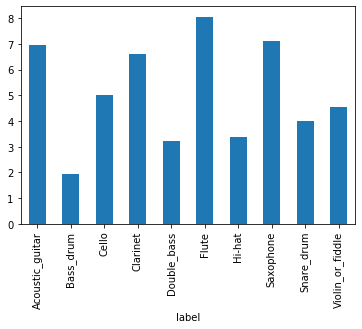

In [0]:
df.groupby(['label'])['length'].mean().plot(kind='bar')

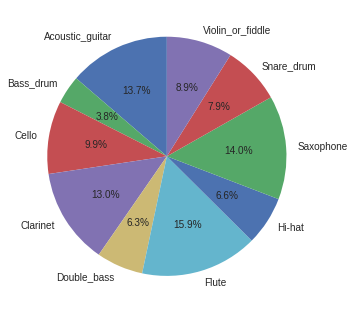

In [0]:
plt.style.use('seaborn')
class_dist = df.groupby(['label'])['length'].mean()
fig, ax = plt.subplots()
ax.pie(df.groupby(['label'])['length'].mean(), labels=df.groupby(['label'])['length'].mean().index, autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()

In [0]:
for c in classes:
  wav_file = df[df.label == c].index[0]
  signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + wav_file, sr = 44100)
  print(c)
  print(signal.shape[0] / rate)
  print()
  #  requires to plot the signal and rate

Acoustic_guitar
10.0

Bass_drum
2.44

Cello
4.56

Clarinet
6.7

Double_bass
6.26

Flute
5.08

Hi-hat
3.14

Saxophone
4.14

Snare_drum
5.98

Violin_or_fiddle
2.96



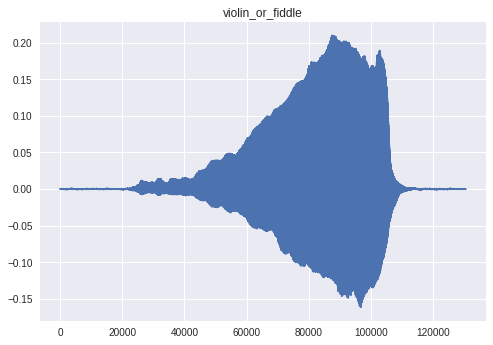

In [0]:
# violin_or_fiddle
plt.title('violin_or_fiddle')
plt.plot(signal, '-')
plt.show() 

In [0]:
wav_file

'd6144e01.wav'

In [0]:
signal_split = signal[:10000]

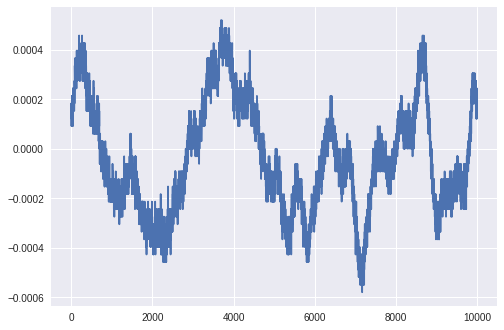

In [0]:
plt.plot(signal_split, '-')

In [0]:
IPython.display.Audio('/content/Audio-Classification/wavfiles/'+ wav_file)

## create two dir

In [0]:
def plot_signals(signals):
  fig, axes = plt.subplots(2, 5, sharey=True, figsize=(20,5))
  fig.suptitle('Time Series', size=16)
  i = 0
  for x in range(2):
    for y in range(5):
      axes[x, y].set_title(list(signals.keys())[i])
      axes[x, y].plot(list(signals.values())[i])
      axes[x, y].get_xaxis().set_visible(False)
      axes[x, y].get_yaxis().set_visible(False)
      i += 1

def plot_fft(fft):
  fig, axes = plt.subplots(2, 5, sharey=True, figsize=(20,5))
  fig.suptitle('Fourier Transforms', size=16)
  i = 0
  for x in range(2):
    for y in range(5):
      data = list(fft.values())[i]
      Y, freq = data[0], data[1]
      axes[x, y].set_title(list(fft.keys())[i])
      axes[x, y].plot(freq, Y)
      axes[x, y].get_xaxis().set_visible(False)
      axes[x, y].get_yaxis().set_visible(False)
      i += 1

def plot_fbank(fbank):
  fig, axes = plt.subplots(2, 5, sharey=True, figsize=(20,5))
  fig.suptitle('Filter Bank Coefficients', size=16)
  i = 0
  for x in range(2):
    for y in range(5):
      axes[x, y].set_title(list(fbank.keys())[i])
      axes[x, y].imshow(list(fbank.values())[i], cmap='hot', interpolation='nearest')
      axes[x, y].get_xaxis().set_visible(False)
      axes[x, y].get_yaxis().set_visible(False)
      i += 1



def plot_mfccs(mfccs):
  fig, axes = plt.subplots(2, 5, sharey=True, figsize=(20,5))
  fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
  i = 0
  for x in range(2):
    for y in range(5):
      axes[x, y].set_title(list(mfccs.keys())[i])
      axes[x, y].imshow(list(mfccs.values())[i],
                        cmap='hot', interpolation='nearest')
      axes[x, y].get_xaxis().set_visible(False)
      axes[x, y].get_yaxis().set_visible(False)
      i += 1

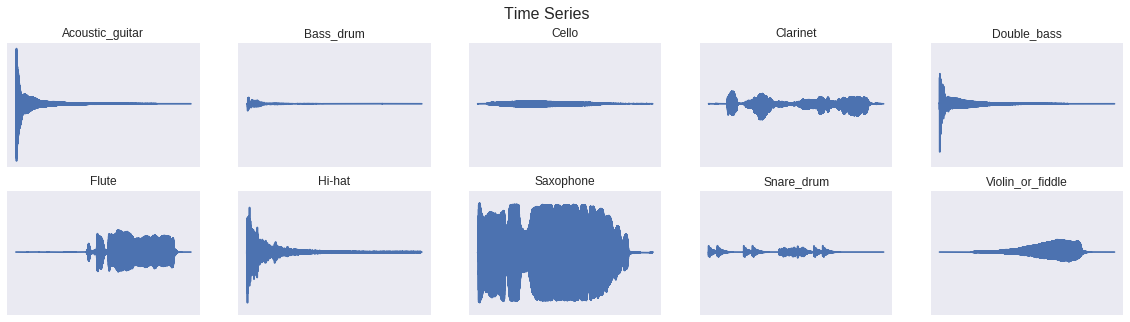

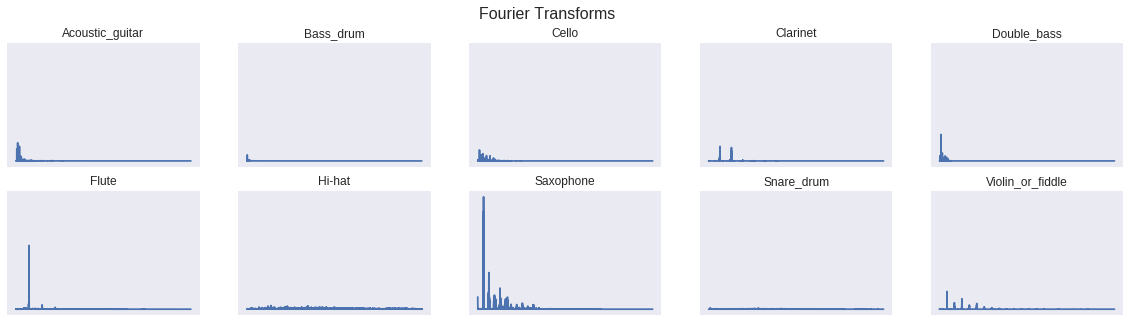

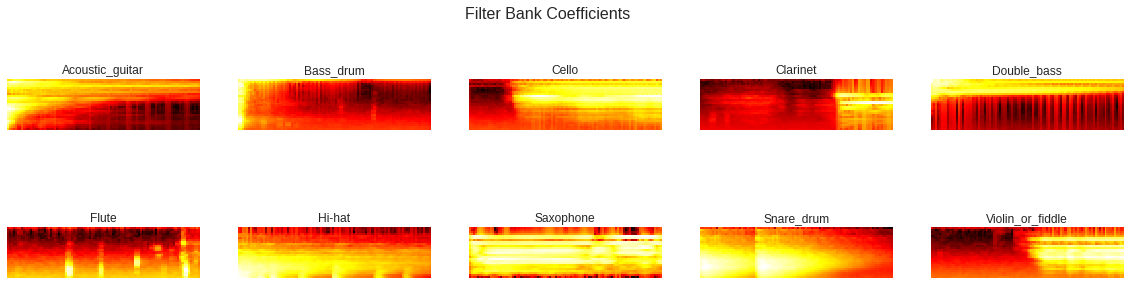

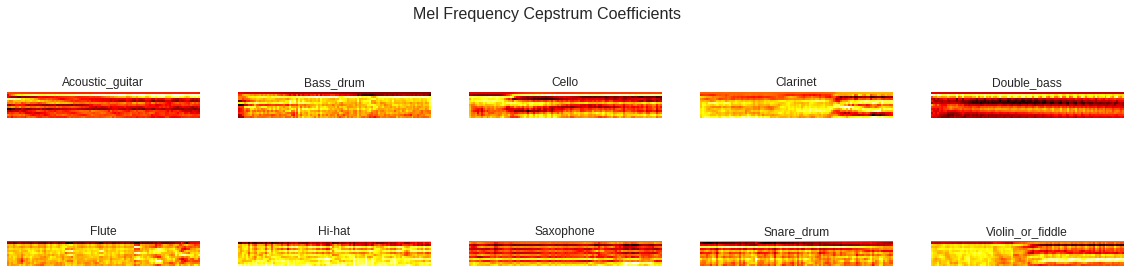

In [0]:
def calc_fft(y, rate):
  n = len(y)
  freq = np.fft.rfftfreq(n, d=1/rate)
  magnitude = abs(np.fft.rfft(y) / n)
  return (magnitude, freq)



signals ={}
fft = {}
fbank = {}
mfccs = {}

for c in classes:
  wav_file = df[df.label == c].index[0]
  signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + wav_file, sr = 44100)
  signals[c] = signal
  fft[c] = calc_fft(signal, rate)
  
  bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
  fbank[c] = bank

  mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
  mfccs[c] = mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

## Remove low magnitude parts

In [0]:
def envelope(y, rate, threshold):
  # searhc signal envelop image
  # want to detect magnitude differences changes
  mask = []
  y = pd.Series(y).apply(np.abs)
  y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean() # check pandas series.rolling
  for mean in y_mean:
    if mean > threshold:
      mask.append(True)
    else:
      mask.append(False)
  return mask

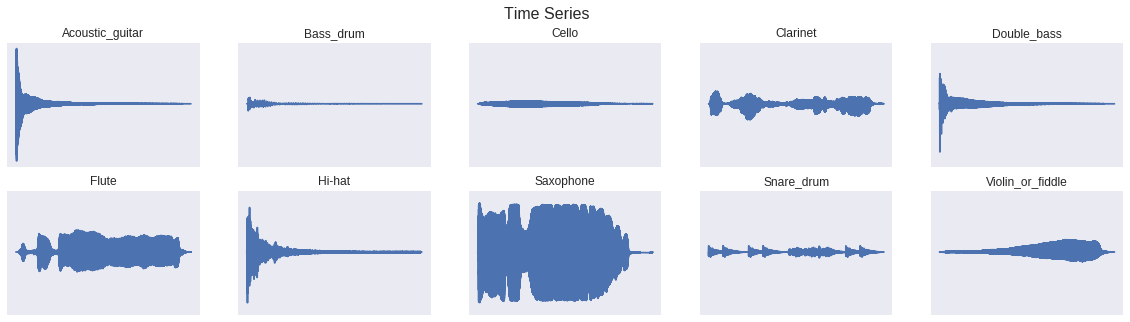

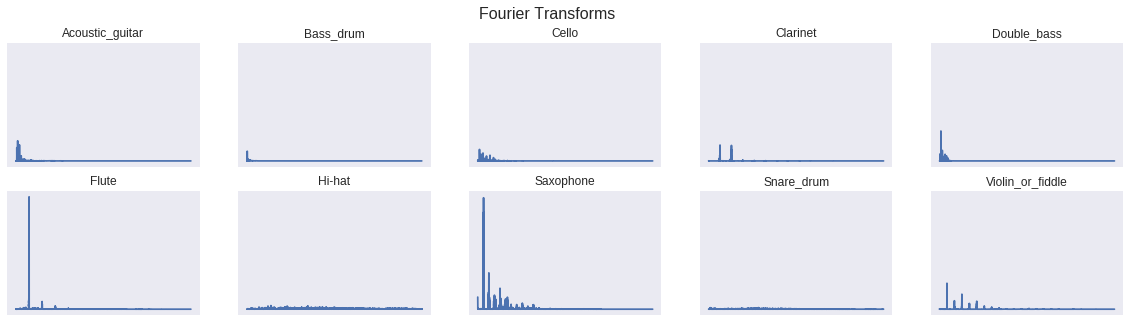

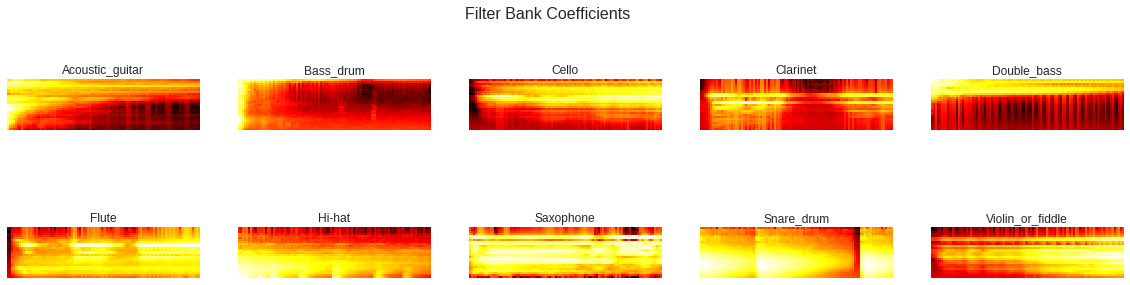

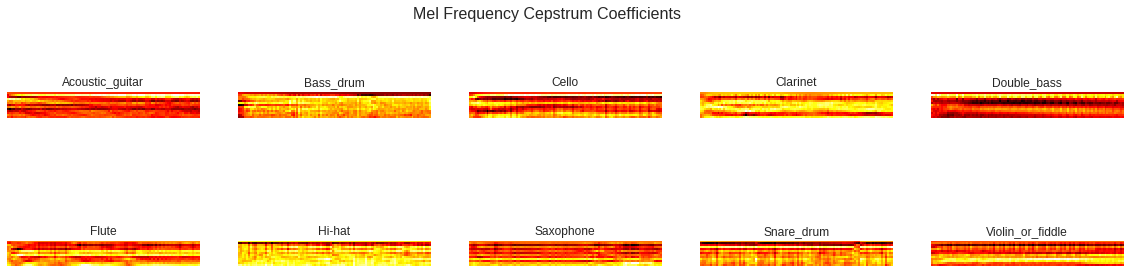

In [0]:
for c in classes:
  wav_file = df[df.label == c].index[0]
  signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + wav_file, sr = 44100)
  mask = envelope(signal, rate, 0.0005)
  signal = signal[mask]

  signals[c] = signal
  fft[c] = calc_fft(signal, rate)
  
  bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
  fbank[c] = bank

  mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
  mfccs[c] = mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

# check flute <- removed first small amounts

In [0]:
df = df.reset_index()

In [0]:
!mkdir Audio-Classification/clean

In [0]:
if len(os.listdir('/content/Audio-Classification/clean')) == 0:
  for f in tqdm_notebook(df.fname):
    signal, rate = librosa.load('/content/Audio-Classification/wavfiles/' + f, sr=16000)
    mask = envelope(signal, rate, 0.0005)
    wavfile.write(filename='/content/Audio-Classification/clean/'+f, rate=rate, data=signal[mask])

## Anatomy

In [0]:
sample_wav_file_path = '/content/Audio-Classification/wavfiles/03fc1f96.wav'


signal, rate = librosa.load(sample_wav_file_path, sr= 41000)

In [0]:
signal

array([-3.2992386e-05,  8.1362004e-06,  1.9451227e-05, ...,
        2.2629340e-05, -3.5433761e-05,  2.8530994e-07], dtype=float32)

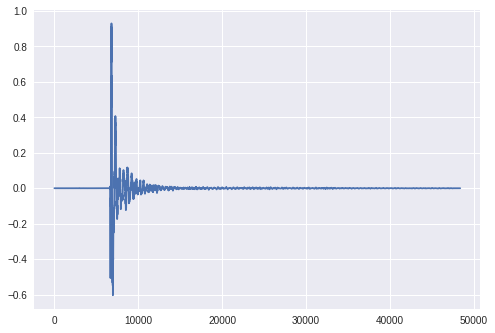

In [0]:
plt.plot(signal)

In [0]:
rate

41000

In [0]:
IPython.display.Audio(sample_wav_file_path)

In [0]:
df[df['fname']=='03fc1f96.wav']

,fname,label,length
227,03fc1f96.wav,Bass_drum,1.18


In [0]:
librosa_fft_test = librosa.core.stft(signal)

librosa_fft_test.shape

(1025, 95)

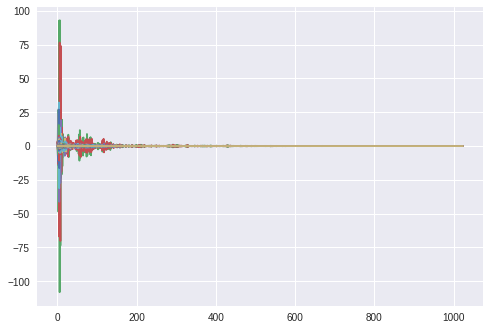

In [0]:
plt.plot(librosa_fft_test)
plt.show()

In [0]:
signal.shape[0] / 26

1860.7692307692307

In [0]:
mfccs = mfcc(signal, rate, nfilt=26, nfft=1860, )

In [0]:
mfccs

array([[-14.06302329, -42.05384472,  -4.98205826, ...,  -3.10999374,
          2.96642479,   5.37386796],
       [-14.0154177 , -38.92444772,  -2.67195924, ...,  -1.30924038,
          0.20502084,   1.25114298],
       [-13.98514879, -41.73681801,  -4.8044845 , ...,   3.50014536,
         -0.21810738,  -1.87377417],
       ...,
       [-13.51883069, -11.21231125,  16.90915967, ...,   4.96292629,
         -1.60112631,  -3.86414546],
       [-13.82272296, -14.80814903,  14.1773819 , ...,   4.06371652,
          1.87378059,  -0.49231771],
       [-14.29458751, -26.36712752,   1.7090256 , ...,  -2.94063011,
         -3.39521931,  -4.37238146]])

In [0]:
mfccs = mfccs.T

In [0]:
mfccs.shape

(13, 117)

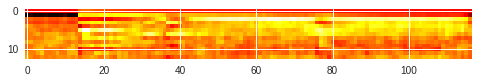

In [0]:
plt.imshow(mfccs, cmap='hot')

## Model

In [0]:
from keras import layers, models
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

In [0]:
df.head()

,fname,label,length
0,5388d14d.wav,Saxophone,4.14
1,c685f05f.wav,Saxophone,1.54
2,36d20ab5.wav,Saxophone,4.90
3,d6665734.wav,Saxophone,10.50
4,7352e28f.wav,Saxophone,6.24


In [0]:
# create one fun <- create x metrics / y metrics

n_samples = 2 * int(df['length'].sum() / 0.1)

# create distribution <- for convert values to sum of 1
prob_dist = class_dict / class_dist.sum()
choice = np.random.choice(class_dist.index, p = prob_dist)

choice

'Flute'

In [0]:
class Config:
  def __init__(self, mode='conv', nfilt=26, nfeat=13, nfft=512, rate=16000):
    self.mode = mode
    self.nfilt= nfilt
    self.nfeat= nfeat
    self.nfft = nfft
    self.rate = rate
    self.step = int(rate / 10)
    
    

In [0]:
config = Config()

In [0]:
df.head()

,fname,label,length
0,5388d14d.wav,Saxophone,4.14
1,c685f05f.wav,Saxophone,1.54
2,36d20ab5.wav,Saxophone,4.90
3,d6665734.wav,Saxophone,10.50
4,7352e28f.wav,Saxophone,6.24


In [0]:
class_dist.index

Index(['Acoustic_guitar', 'Bass_drum', 'Cello', 'Clarinet', 'Double_bass',
       'Flute', 'Hi-hat', 'Saxophone', 'Snare_drum', 'Violin_or_fiddle'],
      dtype='object', name='label')

In [0]:
df.set_index('fname', inplace=True)

In [0]:
def build_rand_feat():
  X = []
  y = []
  
  _min, _max  = float('inf'), -float('inf')
  
  for _ in tqdm_notebook(range(n_samples)):
    rand_class = np.random.choice(class_dist.index, p = prob_dist)
    file = np.random.choice(df[df.label == rand_class].index)
    
    file_path = '/content/Audio-Classification/clean/' + file
    rate, wav = wavfile.read(file_path)
    
    label = df.at[file, 'label']
    
    
    rand_index = np.random.randint(0, wav.shape[0] - config.step)
    sample = wav[rand_index : rand_index + config.step]
    
    X_sample = mfcc(sample, config.rate, numcep = config.nfeat, nfilt=config.nfilt, nfft=config.nfft).T
    _min = min(np.amin(X_sample), _min)
    _max = max(np.amax(X_sample), _max)
    
    X.append(X_sample if config.mode == 'conv' else X_sample.T)
    y.append(classes.index(label))
  X, y = np.array(X), np.array(y)
  X = (X - _min) / (_max - _min)
  
  
  if config.mode == 'conv':
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
  elif config.mode == 'time':
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2])
  
  y = to_categorical(y, num_classes=10)
  return X, y

In [0]:
classes

['Acoustic_guitar',
 'Bass_drum',
 'Cello',
 'Clarinet',
 'Double_bass',
 'Flute',
 'Hi-hat',
 'Saxophone',
 'Snare_drum',
 'Violin_or_fiddle']

In [0]:
if config.mode == 'conv':
  X, y = build_rand_feat()
  
  
elif confg.mode == 'time':
  X, y  = build_rand_feat()
  


In [0]:
X

array([[[[0.45061156],
         [0.45065033],
         [0.44991377],
         ...,
         [0.44871467],
         [0.44885844],
         [0.44773403]],

        [[0.54274293],
         [0.6958653 ],
         [0.70328554],
         ...,
         [0.69588449],
         [0.71810391],
         [0.66976004]],

        [[0.40680932],
         [0.37191169],
         [0.37996165],
         ...,
         [0.37708587],
         [0.397889  ],
         [0.40059523]],

        ...,

        [[0.60080312],
         [0.60125264],
         [0.62829876],
         ...,
         [0.62681355],
         [0.62171847],
         [0.59977741]],

        [[0.63003683],
         [0.61692099],
         [0.66249098],
         ...,
         [0.65313982],
         [0.64957633],
         [0.62547439]],

        [[0.49461073],
         [0.43700116],
         [0.46778077],
         ...,
         [0.45954598],
         [0.44657817],
         [0.47826635]]],


       [[[0.43339399],
         [0.4259604 ],
         [0.42

In [0]:
X.shape

(30444, 13, 9, 1)

In [0]:
test_x = X[0]

In [0]:
test_x.shape

(13, 9, 1)